This notebook involves the intersection of authors and members of the Shakespeare and Company lending library.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib_venn import venn2

In [2]:
books = pd.read_csv('../data/raw/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
members = pd.read_csv('../data/raw/SCoData_members_v1.2_2022_01.csv', encoding='utf-8')

In [3]:
books.columns

Index(['uri', 'title', 'author', 'editor', 'translator', 'introduction',
       'illustrator', 'photographer', 'year', 'format', 'uncertain',
       'ebook_url', 'volumes_issues', 'notes', 'event_count', 'borrow_count',
       'purchase_count', 'circulation_years', 'updated'],
      dtype='object')

In [4]:
members.columns

Index(['uri', 'name', 'sort_name', 'title', 'gender', 'is_organization',
       'has_card', 'birth_year', 'death_year', 'membership_years', 'viaf_url',
       'wikipedia_url', 'nationalities', 'addresses', 'postal_codes',
       'arrondissements', 'coordinates', 'notes', 'updated'],
      dtype='object')

## Authors

In the next steps, the authors will be identified.

In [5]:
# Filter books of format 'Book', select relevant columns, and split authors into lists
book_authors = (
    books[books['format'] == 'Book'][['author']]  # Filter only books, selecting 'author' column
    .dropna(subset=['author'])  # Drop rows with missing authors specifically
)

# Exploding the 'author' column to create a new row for each author per book
exploded_authors = book_authors.explode('author')

# Remove duplicates to get only unique authors
unique_authors = exploded_authors.drop_duplicates(subset=['author'])

# Display a sample of the resulting DataFrame to verify the result
unique_authors.sample(10)
unique_authors.shape

(1995, 1)

## Members

In the next step, the members will be identified.

In [6]:
# Filter members and remove duplicates in one step
member_filtered = members[['sort_name']].dropna().drop_duplicates(subset=['sort_name'])

# Verify the shape of the filtered and deduplicated data
member_filtered.shape

# unique_members is now simply the same as member_filtered
unique_members = member_filtered

# Verify the shape of the unique members
unique_members.shape

(4804, 1)

## Intersection: Authors and Members

Now the intersection between authors and members will be identified to extract the authors who were also members of the Shakespeare and Company lending library.

In [7]:
# Extract unique authors and members
unique_authors = set(unique_authors['author'])
unique_members = set(unique_members['sort_name'])

# Calculate the intersection
intersection_names = unique_authors.intersection(unique_members)

# Create a DataFrame from the intersection
intersection_df = pd.DataFrame({'name': list(intersection_names)})

# Merge to get all columns for matched members
member_is_author = members[members['sort_name'].isin(intersection_df['name'])]

# Display shapes for debugging/verification
print(f"Intersection count: {len(intersection_names)}")
print(f"Matched members shape: {member_is_author.shape}")

Intersection count: 84
Matched members shape: (84, 19)


In [8]:
member_is_author.columns

Index(['uri', 'name', 'sort_name', 'title', 'gender', 'is_organization',
       'has_card', 'birth_year', 'death_year', 'membership_years', 'viaf_url',
       'wikipedia_url', 'nationalities', 'addresses', 'postal_codes',
       'arrondissements', 'coordinates', 'notes', 'updated'],
      dtype='object')

Now saving the member_is_author data to a csv file.

In [9]:
member_is_author.to_csv('../data/member_is_author.csv', index=False) 

The next step is to create a Venn diagram to visualize the intersection between authors and members.

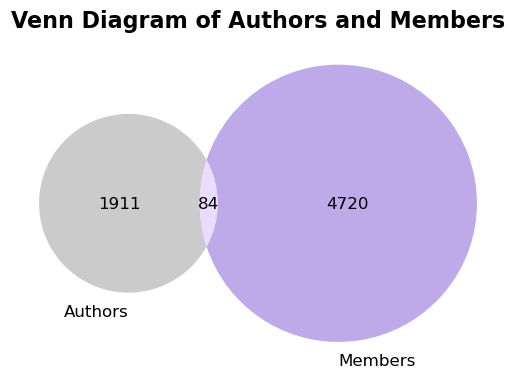

In [10]:
# Create the Venn diagram for authors with customized colors and modern style
venn = venn2(subsets=(len(unique_authors) - len(intersection_names), 
                     len(unique_members) - len(intersection_names), 
                     len(intersection_names)),
             set_labels=('Authors', 'Members'),
             set_colors=('darkgray', 'mediumpurple'),
             alpha=0.6)

# Customize the subset labels
for subset in venn.subset_labels:
    if subset is not None:
        subset.set_fontsize(12)
        subset.set_color('black')

# Display the plot
plt.title("Venn Diagram of Authors and Members", fontsize=16, fontweight='bold')
plt.show()

In [11]:
# Calculate the size of the intersection set
intersection_size = len(intersection_names)

# Calculate the percentages
percent_intersection_authors = (intersection_size / len(unique_authors)) * 100
percent_intersection_members = (intersection_size / len(unique_members)) * 100

# Print the results
print(f'Percent of the intersection relative to authors: {percent_intersection_authors:.2f}%')
print(f'Percent of the intersection relative to members: {percent_intersection_members:.2f}%')

Percent of the intersection relative to authors: 4.21%
Percent of the intersection relative to members: 1.75%
